<a href="https://colab.research.google.com/github/MelanieColeman/2023_Intro_Python/blob/main/W2_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercise) Ocean Floats Data Analysis

**Learning Objectives**

*    Creating new arrays using `linspace` and `arange`
*    Computing basic formulas with `numpy` arrays
*    Loading data from `.npy` files
*    Performing reductions (e.g. `mean`, `std` on `numpy` arrays)
*    Making 1D line plots
*    Making scatterplots
*    Annotating plots with titles and axes

In this problem, we use real data from ocean profiling floats. [ARGO](http://www.argo.ucsd.edu/) floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. [ARGO](http://www.argo.ucsd.edu/) floats collect one “profile” (a set of messurements at different depths or “levels”).

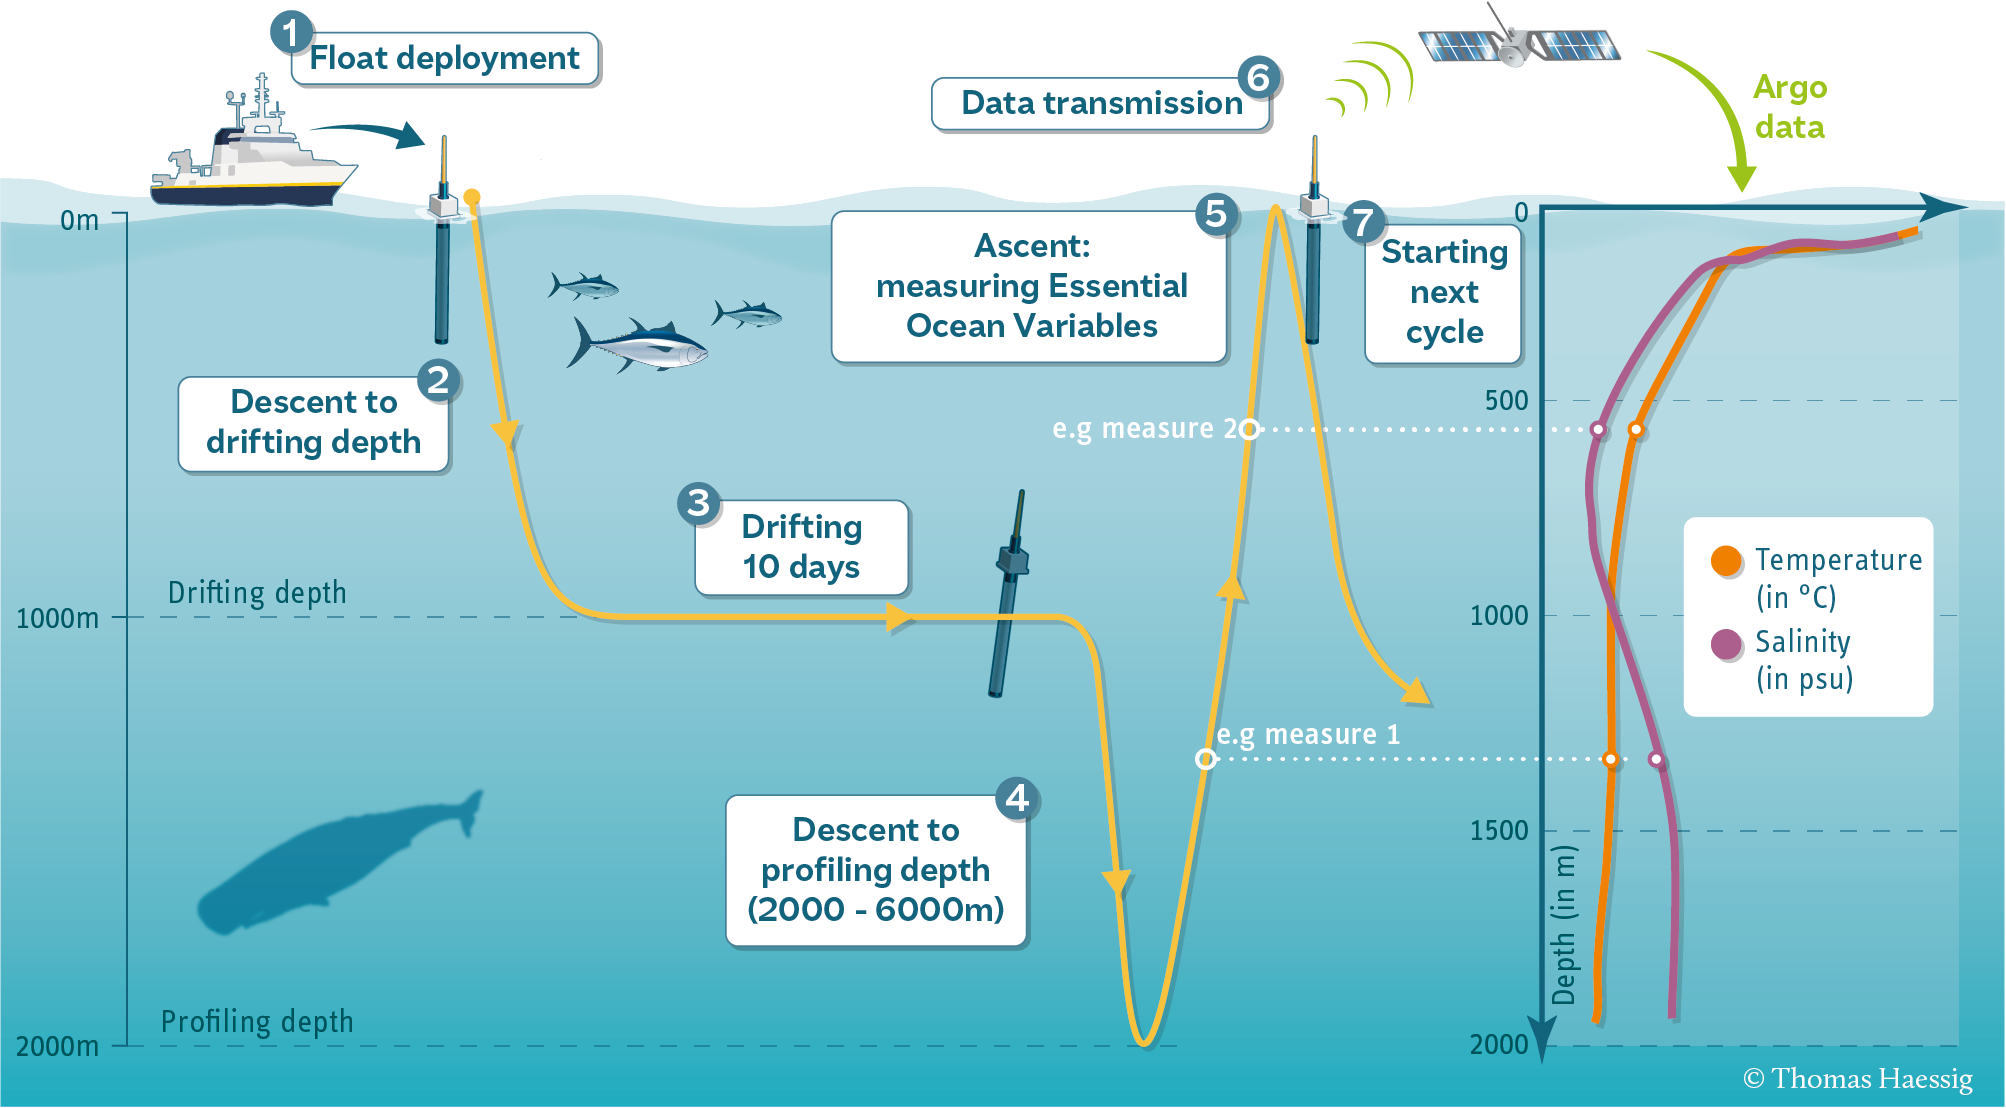


Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.

Let’s start by using [pooch](https://www.fatiando.org/pooch/latest/) to download the data files we need for this exercise. The following code will give you a list of `.npy` files that you can open in the next step.

In [2]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

Unzipping contents of '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ' to '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip'


['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy']

In [3]:
import numpy as np

**Q1) Load each data file as a `numpy` array.**

You can use whatever names you want for your arrays, but we recommend:

`T`: temperature

`S`: salinity

`P`: pressure

`date`: date

`lat`: latitude

`lon`: longitude

`level`: depth level

Hint 1: Look at the file name (the items in `files`) to know which files corresponds to which variable.

Hint 2: Check out the documentation for [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Display the names of the items in files here

In [4]:
files

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy']

Then, load the files as `numpy` arrays, for instance using list comprehension

In [26]:
lon,lat,T,date,P,levels,S = [np.load(files[element]) for element in range(7)]

**Q2) Recreate the `level` array using `np.arange` and `np.linspace`**

Hints:

*   The documentation for `np.arange` is [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
*   The documentation for `np.linspace` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
*   The documentation for `np.testing.assert_equal` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Display the `level` array

In [28]:
print(levels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


(78,)

Recreate the `level` array using `np.arange` and call it `level_arange`

In [33]:
level_arange = np.arange(78)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Check that `level` and `level_arange` are equal using `np.testing.assert_equal`

In [36]:
np.testing.assert_equal(levels,level_arange, err_msg='They are not equal')

Recreate the `level` array using `np.linspace` and call it `level_linspace`

In [39]:
level_linspace = np.linspace(0,77,78)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77.]


Check that `level` and `level_linspace` are equal using `np.testing.assert_equal`

In [41]:
np.testing.assert_equal(levels,level_linspace, err_msg='They are not equal')

**Q3) Examine the shapes of `T`, `S` and `P` compared to `lon`, `lat`, `date` and `level`. How do you think they are related?**

Hint: Check out the [NDArrays subsection](#NDArrays)

Display the shapes of all loaded variables

In [49]:
T.shape

(78, 75)

In [48]:
S.shape

(78, 75)

In [50]:
P.shape

(78, 75)

In [51]:
lon.shape

(75,)

In [52]:
lat.shape

(75,)

In [53]:
date.shape

(75,)

In [54]:
levels.shape

(78,)

Based on the shapes, which dimensions do you think are shared among the arrays?

The array named levels has a common dimension with the arrays named T, S and P, which is of a length of 78. In addition to that, the arrays amed T, S, P, lon, lat and date have a shared dimension of 75.

**Q4) Based on the formula below, calculate the seawater density `relative_density`, relative to pure water, as a function of the temperature, the salinity, and the pressure.**

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

where:

*    The densities $\rho$ and $ρ_{Pure\ Water}$ are in units $kg/m^{3}$.
*    The constants $a$, $b$, and $c$ are provided below.
*    The function to calculate the conservative temperature $\Theta$ (in units Celcius) from temperature, salinity, and pressure is provided below.
*    The temperature $T$ is in units Celcius.
*    The salinity $S$ is in units $g/kg$.
*    The pressure $p$ is in units $dbar$.

Hint: The loaded `numpy` arrays `temperature`, `salinity`, and `pressure` already have the right units and no conversion is needed.

Sources:

1) [*Roquet, Fabien, et al. "Defining a simplified yet “realistic” equation of state for seawater." Journal of Physical Oceanography 45.10 (2015): 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). [(License)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Below are the constants a, b, and c:

In [55]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3

Let's import the library [`gsw`](https://teos-10.github.io/GSW-Python/) that contains the function `CS_from_t`to calculate the conservative temperature $\Theta$ from temperature, salinity, and pressure.

In [56]:
!pip install gsw
from gsw import CT_from_t

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 21.5 MB/s eta 0:00:00


Now it's all up to you. Here's the equation to avoid having to scroll back up:

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculate the conservative temperature

Hint: use [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [57]:
CT = CT_from_t(S,T,P)

Calculate the `relative density` using the equation above

In [58]:
relative_density = a*S + b*CT + c*CT**2

**Q4) Make a plot for each column of data in `T`, `S`, `P`, and
`relative_density` (four plots)**

For this question, we have to use the [Pyplot interface](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) of the [Matplotlib library](https://matplotlib.org/) for visualization even if we have not covered it extensively in class yet. But fear not as we provide easy-to-follow instructions below. 😊

The first step is to import Pyplot. Simply execute the code below.

In [59]:
import matplotlib.pyplot as plt

Then, we will plot variables as a function of the ocean depth, `level`. Simply read the documentation [at this link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to infer the correct syntax. Label your axes using `plt.xlabel` and `plt.ylabel`, and add a title using `plt.title`.

Hint: The vertical scale should use the `level` data to be consistent with oceanographic conventions.

Hint 2: Each plot should have a line for each column of data. It will look messy, like the plot below:

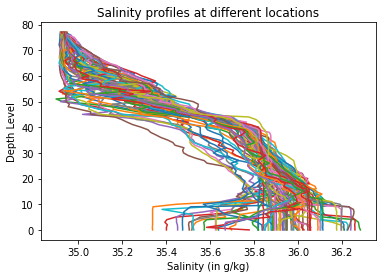

Text(0.5, 1.0, 'Temperature Profiles at different locations')

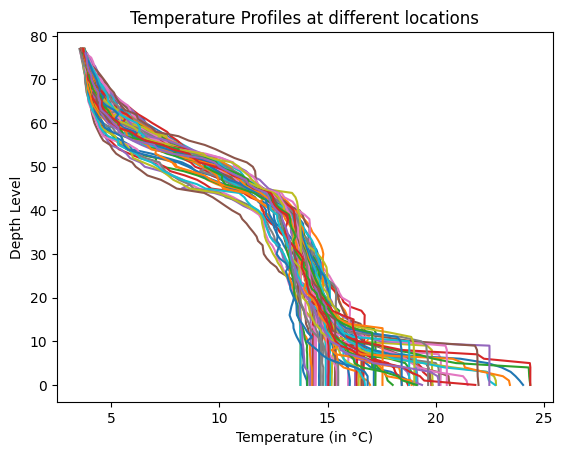

In [63]:
plt.plot(T,levels);
plt.xlabel('Temperature (in °C)')
plt.ylabel('Depth Level')
plt.title('Temperature Profiles at different locations')

Make more plots below:

Text(0.5, 1.0, 'Salinity Profiles at different locations')

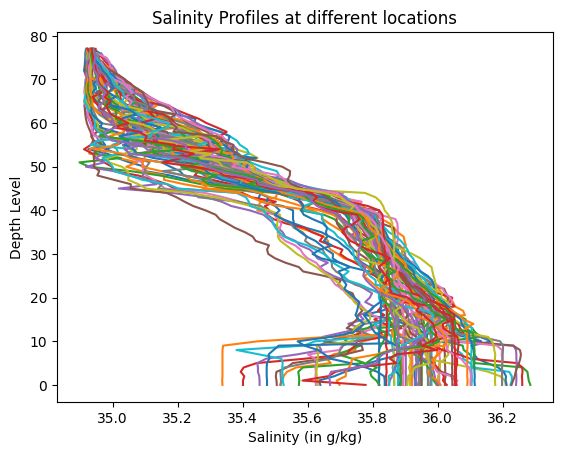

In [64]:
plt.plot(S,levels);
plt.xlabel('Salinity (in g/kg)')
plt.ylabel('Depth Level')
plt.title('Salinity Profiles at different locations')

Text(0.5, 1.0, 'Pressure Profiles at different locations')

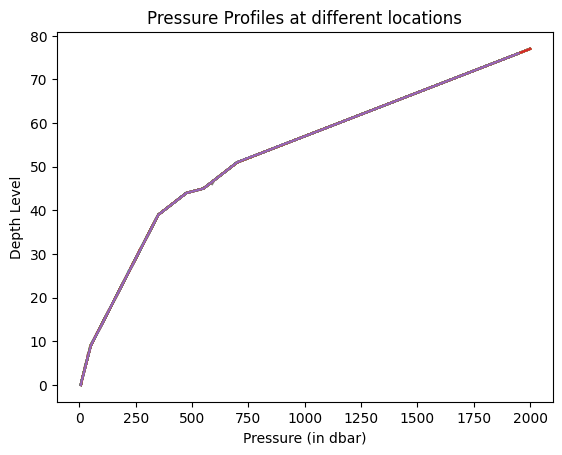

In [67]:
plt.plot(P,levels);
plt.xlabel('Pressure (in dbar)')
plt.ylabel('Depth Level')
plt.title('Pressure Profiles at different locations')

Text(0.5, 1.0, 'Relative Density Profiles at different locations')

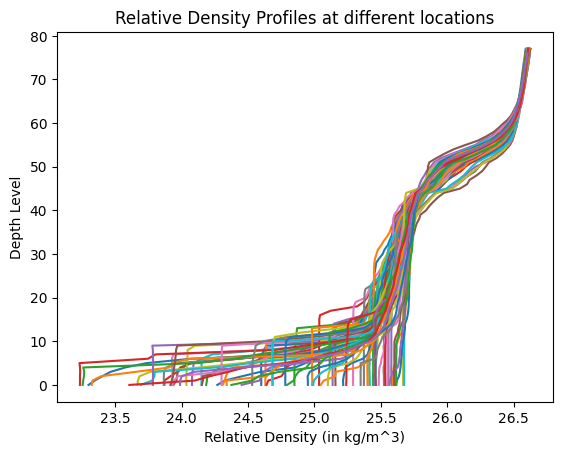

In [66]:
plt.plot(relative_density,levels);
plt.xlabel('Relative Density (in kg/m^3)')
plt.ylabel('Depth Level')
plt.title('Relative Density Profiles at different locations')

**Q5) Compute the mean and standard deviation of each of `T`, `S`, `P`, and `seawater_density` at each depth in `level`.**

Hint: You may want to read the documentation at [this link](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and [this link](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Hint 2: You can check that you took the mean and standard deviations along the correct axes by checking the `shape` of your results.

Compute the means...

In [76]:
mean_temperatures = np.mean(T,axis=1)

In [131]:
mean_pressure = np.mean(P,axis=1)

In [78]:
mean_salinity = np.mean(S,axis=1)

In [79]:
mean_relative_density = np.mean(relative_density,axis=1)

... and the standard deviations.

In [87]:
std_temperatures = np.std(T,axis=1)

In [132]:
std_pressure = np.std(P,axis=1)

In [89]:
std_salinity = np.std(S,axis=1)

In [90]:
std_relative_density = np.std(relative_density,axis=1)

Check that they have the same shape as your vertical level `lev` coordinate:

In [94]:
np.testing.assert_equal(mean_temperatures.shape,levels.shape, err_msg = 'They are not the same shape')

In [95]:
np.testing.assert_equal(mean_pressure.shape,levels.shape, err_msg = 'They are not the same shape')

In [96]:
np.testing.assert_equal(mean_salinity.shape,levels.shape, err_msg = 'They are not the same shape')

In [98]:
np.testing.assert_equal(mean_relative_density.shape,levels.shape, err_msg = 'They are not the same shape')

In [99]:
np.testing.assert_equal(std_temperatures.shape,levels.shape, err_msg = 'They are not the same shape')

In [100]:
np.testing.assert_equal(std_pressure.shape,levels.shape, err_msg = 'They are not the same shape')

In [101]:
np.testing.assert_equal(std_salinity.shape,levels.shape, err_msg = 'They are not the same shape')

In [102]:
np.testing.assert_equal(std_relative_density.shape,levels.shape, err_msg = 'They are not the same shape')

**Q6) Now make similar plots, but show only the mean `T`, `S`, `P`, and `seawater_density` at each depth. Show error bars on each plot using the standard deviations.**

Hint: If you are feeling adventurous, you can directly use the [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) function.

Hint 2: You should get plots similar to the one below

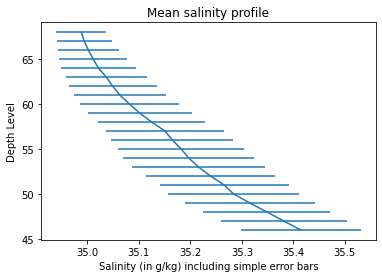

Text(0.5, 1.0, 'Mean Temperature Profile')

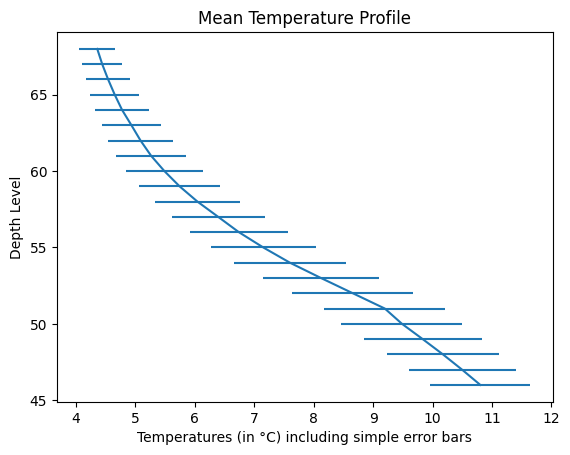

In [104]:
plt.errorbar(mean_temperatures,levels,xerr=std_temperatures)
plt.xlabel('Temperatures (in °C) including simple error bars')
plt.ylabel('Depth Level')
plt.title('Mean Temperature Profile')

Three more plots and we'll be all set! 🙂

Text(0.5, 1.0, 'Mean Salinity Profile')

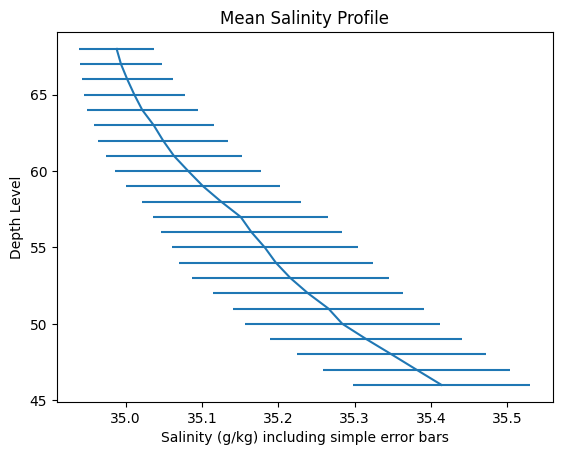

In [105]:
plt.errorbar(mean_salinity,levels,xerr=std_salinity)
plt.xlabel('Salinity (in g/kg) including simple error bars')
plt.ylabel('Depth Level')
plt.title('Mean Salinity Profile')

Text(0.5, 1.0, 'Mean Pressure Profile')

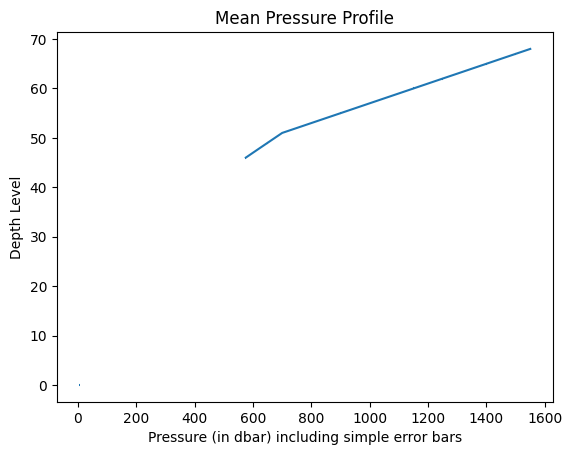

In [106]:
plt.errorbar(mean_pressure,levels,xerr=std_pressure)
plt.xlabel('Pressure (in dbar) including simple error bars')
plt.ylabel('Depth Level')
plt.title('Mean Pressure Profile')

Text(0.5, 1.0, 'Mean Relative Density Profile')

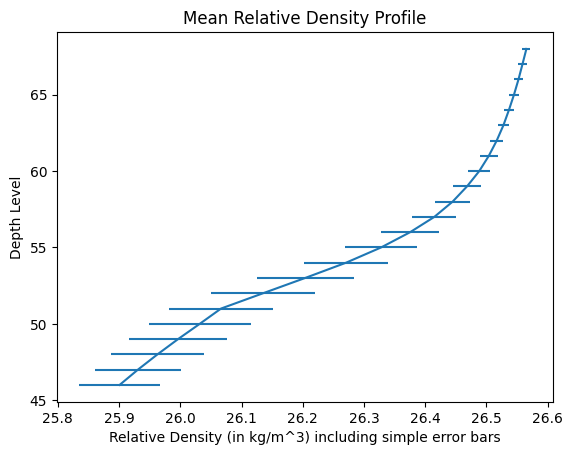

In [107]:
plt.errorbar(mean_relative_density,levels,xerr=std_relative_density)
plt.xlabel('Relative Density (in kg/m^3) including simple error bars')
plt.ylabel('Depth Level')
plt.title('Mean Relative Density Profile')

**Q7) Account For Missing Data**

The profiles contain many missing values. These are indicated by the special “Not a Number” value, or `np.nan`.

When you take the mean or standard deviation of data with NaNs in it, the entire result becomes `NaN`. Instead, if you use the special functions `np.nanmean` and `np.nanstd`, you tell NumPy to ignore the NaNs.

Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

Hint: Links to the [`np.nanmean` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) and the [`np.nanstd` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculate the means below ignoring the missing values. We trust that you can now come up with the full syntax yourself 😎

In [121]:
mean_temperature_nan = np.nanmean(T, axis = 1)
print(mean_temperature_nan)

[17.60172602 17.57223609 17.5145833  17.42326395 17.24943838 17.03730134
 16.76787661 16.44609588 16.17439195 16.04501356 15.65827023 15.4607296
 15.26114862 15.12489191 14.99133783 14.90160808 14.81990544 14.74535139
 14.66822971 14.585027   14.49732434 14.41904053 14.35412163 14.27102702
 14.19081082 14.11487838 14.04347293 13.98067566 13.90994595 13.83274319
 13.76139196 13.69836479 13.62335132 13.54185131 13.46647295 13.39395946
 13.32541891 13.25205403 13.18131082 13.10233782 12.89268916 12.67795943
 12.4649189  12.2178513  11.98270268 11.1281081  10.80430666 10.49702667
 10.1749066   9.83453334  9.48625332  9.19793334  8.66010666  8.12324001
  7.60221333  7.15289333  6.74250667  6.39543999  6.04598667  5.74538665
  5.48913333  5.26604001  5.08768     4.93479998  4.77769334  4.65368
  4.54237334  4.44274664  4.35933333  4.2653784   4.17290539  4.08902703
  3.99864865  3.92163514  3.85617567  3.78916217  3.72950001  3.66207691]


In [122]:
mean_salinity_nan = np.nanmean(S, axis = 1)
print(mean_salinity_nan)

[35.9063218  35.90223138 35.90313435 35.90173139 35.90544583 35.9100359
 35.90946015 35.91343146 35.91967712 35.92615988 35.93195456 35.94055356
 35.94091596 35.93905366 35.93931069 35.93786745 35.93525794 35.93118039
 35.92534328 35.91652257 35.90671895 35.89617843 35.88888019 35.8789927
 35.86946183 35.8598671  35.85061713 35.84211978 35.83150467 35.81969395
 35.80945061 35.80092265 35.79078674 35.77886525 35.76833627 35.75838795
 35.74923783 35.73923559 35.73000444 35.71877237 35.68864513 35.65607159
 35.62678265 35.59231774 35.56205662 35.45401408 35.41392634 35.3810557
 35.34845245 35.31531555 35.28392568 35.26568334 35.2389473  35.21583745
 35.19686081 35.18231257 35.1648436  35.15073542 35.12509338 35.10155869
 35.08199799 35.06317012 35.0490097  35.03678253 35.02174266 35.01135579
 35.00212936 34.99386297 34.98810328 34.98008094 34.97214884 34.96517645
 34.95664983 34.9507985  34.9465696  34.94198907 34.93844852 34.93290652]


In [123]:
mean_pressure_nan = np.nanmean(P, axis = 1)
print(mean_pressure_nan)

[   6.43466671   10.56891882   15.54246568   20.46301361   25.42567552
   30.44459441   35.44324375   40.4391894    45.40810832   50.37837879
   60.47297323   70.48378413   80.40270347   90.48243311  100.51216311
  110.46081151  120.52702795  130.49459282  140.51216064  150.40540376
  160.40810559  170.36216035  180.41080949  190.4108097   200.39999761
  210.34729499  220.32026858  230.31351224  240.28918808  250.41486297
  260.39999843  270.36891752  280.42432136  290.42297075  300.4229691
  310.46351087  320.50675346  330.5297266   340.41891521  350.49729383
  375.41080867  400.3797294   425.29864626  450.38378205  475.30675403
  550.47703016  575.68400146  600.42400716  625.30800456  650.34533773
  675.33333984  700.37067546  750.42400716  800.36666992  850.38534017
  900.4613387   950.45067383 1000.38534261 1050.38534668 1100.45734212
 1150.45201335 1200.40534505 1250.25067383 1300.49467773 1350.40268392
 1400.41734538 1450.25734212 1500.40267253 1550.46401367 1600.44055011
 1650.3

In [124]:
mean_relative_density_nan = np.nanmean(relative_density, axis = 1)
print(mean_relative_density_nan)

[24.78240233 24.78821109 24.80399782 24.82743035 24.87624749 24.93505192
 25.00370627 25.08667989 25.15853103 25.19442663 25.29416932 25.34780098
 25.39473801 25.42469762 25.45551823 25.4747458  25.49108317 25.50466497
 25.5174275  25.5289992  25.54075328 25.54977119 25.55835993 25.56885754
 25.57894844 25.58796136 25.5962309  25.60320348 25.6101259  25.61740575
 25.62466277 25.63150207 25.63954389 25.64740666 25.65510627 25.66257397
 25.66976418 25.67725377 25.68471148 25.69229216 25.71183333 25.73002004
 25.74997439 25.77201241 25.79419758 25.87205588 25.90086615 25.93076294
 25.96266297 25.99633694 26.03175294 26.06651762 26.13495917 26.20371829
 26.27052919 26.3278476  26.37530871 26.41480354 26.44470169 26.46826568
 26.48821066 26.50384344 26.51677094 26.52768415 26.53668014 26.54491708
 26.55228621 26.55881519 26.56519787 26.57104358 26.57666145 26.58191333
 26.58662077 26.59174007 26.59669605 26.60150161 26.60621878 26.61022274]


Similarly, recalculate the standard deviations ignoring the missing values.

In [125]:
std_temperatures_nan = np.nanstd(T, axis = 1)
print(std_temperatures_nan)

[2.92500898 2.86405591 2.83324563 2.75112353 2.60248422 2.42649165
 2.20220589 1.99752543 1.79105862 1.74132795 1.26608465 1.07857596
 0.89761236 0.79748479 0.68525328 0.6394096  0.61835635 0.59387877
 0.56010736 0.55009107 0.53183794 0.52634089 0.52668259 0.51009182
 0.49376838 0.48980214 0.48551874 0.48516171 0.49244536 0.50557331
 0.50881718 0.50482633 0.50093284 0.51411271 0.50962002 0.51399949
 0.52544584 0.53182873 0.5466501  0.55060902 0.56066216 0.57937588
 0.5989958  0.63392862 0.70640057 0.85775269 0.84204226 0.90031954
 0.94661515 0.9902255  1.01786435 1.01690775 1.01944275 0.97987767
 0.94359878 0.88207755 0.82934499 0.7859263  0.71755907 0.68351183
 0.64382025 0.58990336 0.55077313 0.50187175 0.45673872 0.4085324
 0.36748504 0.33272584 0.2996815  0.25570195 0.21802589 0.17365755
 0.14408683 0.11509768 0.09214697 0.08062746 0.06846311 0.06550644]


In [126]:
std_salinity_nan = np.nanstd(S, axis = 1)
print(std_salinity_nan)

[0.21775056 0.22181831 0.21880847 0.21661592 0.20842504 0.19440186
 0.18227015 0.17652957 0.16993855 0.16035545 0.13927144 0.11711354
 0.10460508 0.09743633 0.0927479  0.08493034 0.08485861 0.08050515
 0.07776356 0.07558179 0.07282218 0.07121873 0.07207327 0.07187564
 0.07096565 0.07295663 0.07539408 0.07641816 0.07825997 0.08340698
 0.08535978 0.08535099 0.08681939 0.09210511 0.0933961  0.09597163
 0.09981623 0.10239233 0.10576448 0.10694631 0.10584218 0.10579345
 0.10557016 0.10840863 0.11562906 0.12566351 0.11644936 0.12211051
 0.12341583 0.12609271 0.12781264 0.12486204 0.12508305 0.12873388
 0.1271157  0.12208639 0.11848103 0.11478619 0.10416219 0.1009587
 0.09565639 0.08961304 0.0856126  0.07880695 0.07300245 0.06582414
 0.05933736 0.05371506 0.04872476 0.04207644 0.0362379  0.02930639
 0.02457704 0.01954141 0.01546896 0.01236431 0.01010649 0.00788405]


In [127]:
std_pressure_nan = np.nanstd(P, axis = 1)
print(std_pressure_nan)

[0.8534625  0.37341592 0.38353723 0.36770566 0.55606262 0.50754902
 0.42492636 0.6317751  0.48483957 0.65125039 0.40346418 0.4673176
 0.56304492 0.47487075 0.44050136 0.51091269 0.26877946 0.37268007
 0.2706112  0.29950074 0.42956802 0.33438258 0.31173771 0.37437015
 0.34679885 0.44303045 0.63734733 0.51525968 0.70184377 0.5223867
 0.51517567 0.61400897 0.51982487 0.49389381 0.54115544 0.40921099
 0.3580466  0.30919436 0.34628242 0.30929789 0.30294174 0.3579114
 0.36852196 0.49155671 0.55271425 0.4291849  1.5931604  0.28791041
 0.50431884 0.3960767  0.58088542 0.5878231  0.46728604 0.38447582
 0.4927975  0.4390579  0.31427165 0.28784061 0.40978017 0.39367447
 0.26551312 0.36947741 0.61174401 0.34210648 0.43511937 0.33283111
 0.52793873 0.55593409 0.35726761 0.27060041 0.35534457 0.56095549
 0.42508157 0.40772683 0.30768563 0.32852691 0.32928914 1.3524533 ]


In [128]:
std_relative_density_nan = np.nanstd(relative_density, axis = 1)
print(std_relative_density_nan)

[0.72628301 0.71056568 0.70081643 0.67881162 0.64138477 0.5940689
 0.53119921 0.47274702 0.41060919 0.3944036  0.26406948 0.21696375
 0.17136278 0.15224668 0.12259564 0.11235218 0.10390261 0.09645264
 0.08575266 0.08238438 0.07845066 0.07664579 0.07471934 0.07017307
 0.06593684 0.06311117 0.06108226 0.05923067 0.05819081 0.05585184
 0.05351971 0.05178967 0.04918457 0.04712294 0.04451595 0.04251347
 0.04121078 0.03973457 0.03914086 0.03753483 0.03750514 0.03940821
 0.04072732 0.04245762 0.04731466 0.06110755 0.06560189 0.06954326
 0.07525136 0.08012412 0.08297409 0.08501657 0.0849015  0.07918053
 0.06847191 0.05889347 0.04711212 0.03604723 0.0282499  0.02338445
 0.01821967 0.01424514 0.01090861 0.00923819 0.00845313 0.00774326
 0.00694736 0.00663108 0.00649737 0.00681396 0.00683985 0.0069283
 0.00730848 0.00736786 0.00743527 0.00728612 0.00736686 0.00821908]


**Q8) Create a scatter plot of the longitudinal (`lon`) and latitudinal (`lat`) coordinates of the ARGO floats.**

Again, we have not discussed it in the tutorial, but there is a really convenient scatter plot function called [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) provided by the Pyplot interface.

Bonus: Label your figure using `plt.xlabel`, `plt.ylabel`, and `plt.title`.

Bonus 2: Increase the fontsize of your labels by adding a `fontsize=` argument to the label functions.

Bonus 3: Make your scatter plot beautiful by changing the arguments of [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) listed in the documentation, for example `s=`.

Text(0.5, 1.0, 'Longitudinal and Latidudinal Coordinates of the ARGO Floats')

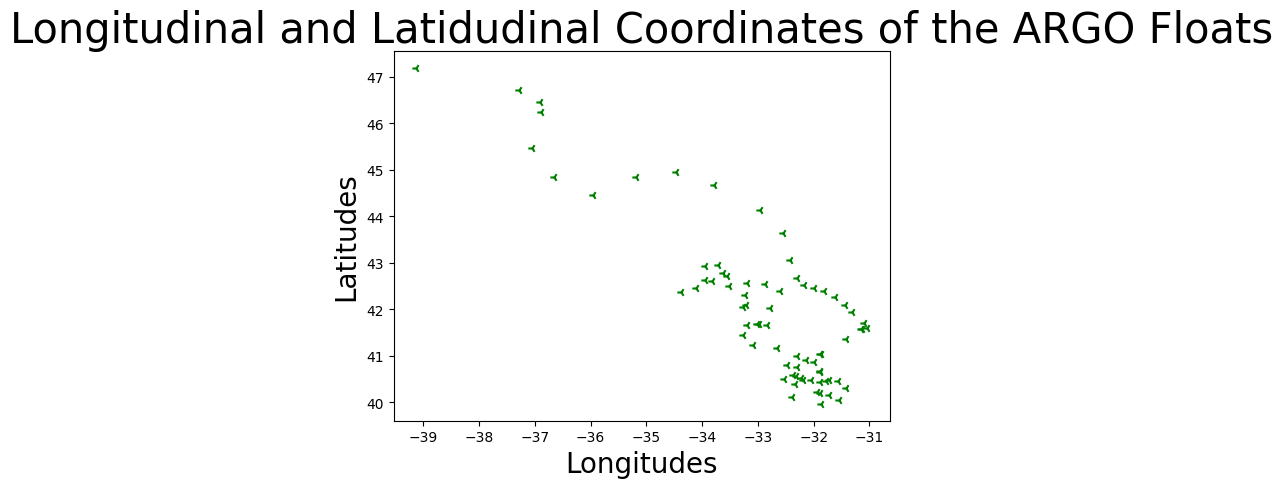

In [143]:
plt.scatter(lon,lat, c='green', marker = '3')
plt.xlabel('Longitudes', fontsize=20)
plt.ylabel('Latitudes', fontsize=20)
plt.title('Longitudinal and Latidudinal Coordinates of the ARGO Floats', fontsize=30)